<a href="https://colab.research.google.com/github/RoksanaMaya/-Amazon-Product-Review-Sentiment-Analysis/blob/main/f_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Imports

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
# from tensorflow

In [ ]:
### Load Data

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Amazon Reviews/AMAZON_FASHION_v3.parquet')[['overall', 'reviewText']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(823065, 2)

In [ ]:
df.head().T

,0,1,2,3,4
overall,5,2,2,5,4
reviewText,Exactly what I needed.,"I agree with the other review, the opening is ...",too tiny an opening,Exactly what I wanted.,These little plastic backs work great. No mor...


Pre-process Labels

In [ ]:
df.loc[:,'sentiment'] = 0
df.loc[df['overall'] < 3,'sentiment'] = 1

In [ ]:
df.head()

,overall,reviewText,sentiment
0,5,Exactly what I needed.,0
1,2,"I agree with the other review, the opening is ...",1
2,2,too tiny an opening,1
3,5,Exactly what I wanted.,0
4,4,These little plastic backs work great. No mor...,0


In [ ]:
df.drop(columns=['overall',], inplace=True)

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.sentiment.value_counts()

0    662352
1    160713
Name: sentiment, dtype: int64

In [ ]:
## Spliting
#data = pd.concat([df[df.sentiment == 0].head(100000), df[df.sentiment == 1].head(100000)], ignore_index=True)

In [ ]:
#del df
data=df

In [ ]:
X = data.reviewText.apply(lambda review: review.lower())
y = data.sentiment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
X_train

217857    it's artived 2 weeks before than its sattled d...
136548    love the look & feel of the ring.  matches the...
224715      love it metals jewelry is absolutely worth it!!
516842                                   love these gloves!
455123                        really great feel and quality
                                ...                        
259178    thought it was bigger. a little disappointed ....
365838    the material has held up very well for the pri...
131932    frankly these are poor quality. they work ok, ...
671155    very bad quality. i washed one time and some a...
121958                          larger than what i expected
Name: reviewText, Length: 617298, dtype: object

In [ ]:
y_train

217857    0
136548    0
224715    0
516842    0
455123    0
         ..
259178    0
365838    0
131932    1
671155    1
121958    0
Name: sentiment, Length: 617298, dtype: int64

In [ ]:
# Encode Labels
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

NLP

In [ ]:
VOCAB_SIZE = 1000
BATCH_SIZE = 64

In [ ]:
# init Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token='')

# fit on train
tokenizer.fit_on_texts(X_train)

# generate sequence
train_tokens = tokenizer.texts_to_sequences(X_train)
train_padded_tokens = tf.keras.preprocessing.sequence.pad_sequences(train_tokens, maxlen=100, padding='post', truncating='post')
train_padded_tokens[:2]

array([[ 39,   1, 126, 415, 240,  46, 112,   1, 169,  16,  37,  68,  39,
        217,  46,   3,  81,  12,  99,  40,   5,  16,   1,   1, 209,   4,
         66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 23,   2,  76, 177,  15,   2, 152,   1,   2, 152,   3,  59,   9,
         11, 287,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# generate sequence
test_tokens = tokenizer.texts_to_sequences(X_test)
test_padded_tokens = tf.keras.preprocessing.sequence.pad_sequences(test_tokens, maxlen=100, padding='post', truncating='post')
test_padded_tokens[:2]

array([[  3, 602,  55, 358, 505, 345, 809, 500, 205,   5, 826,   2, 105,
         97, 150,   4, 502, 140,  22, 250,   1, 554,   8,   1, 106, 225,
        273,  20, 159,   2, 780,  44,   5,   3,  13, 623,   9,  25,  44,
        261,  15,  54,  12, 274, 159,   4,  24,  25,  13,   6,   1, 792,
          3, 183, 273,   3,  13, 508, 544,  26,  10, 117,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 53,  29,   5,  68, 844,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

**Modeling**

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras import Sequential, callbacks

In [ ]:
lstm_model = Sequential(
    [
        Embedding(input_dim=VOCAB_SIZE, output_dim=128),
        Bidirectional(
            LSTM(64, return_sequences=True)
        ),
        Bidirectional(
            LSTM(128)
        ),
        Dense(128, activation='relu'),
        Dropout(rate=0.5),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ]
)

In [ ]:
# EarlyStopping
es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3)

In [ ]:
with tf.device('/GPU:0'):
    # Compile Model
    lstm_model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy',]
    )

    # Train and Validate
    lstm_model.fit(
        train_padded_tokens, y_train,
        epochs=25, steps_per_epoch=250,
        validation_data=(test_padded_tokens, y_test),
        validation_steps=50, callbacks=[es]
    )


Epoch 1/25
250/250 [==============================] - 81s 284ms/step - loss: 0.2737 - accuracy: 0.8818 - val_loss: 0.2140 - val_accuracy: 0.9078
Epoch 2/25
250/250 [==============================] - 72s 289ms/step - loss: 0.2072 - accuracy: 0.9108 - val_loss: 0.2021 - val_accuracy: 0.9124
Epoch 3/25
250/250 [==============================] - 74s 295ms/step - loss: 0.1974 - accuracy: 0.9151 - val_loss: 0.1963 - val_accuracy: 0.9152
Epoch 4/25
250/250 [==============================] - 75s 300ms/step - loss: 0.1911 - accuracy: 0.9179 - val_loss: 0.1938 - val_accuracy: 0.9174
Epoch 5/25
250/250 [==============================] - 73s 294ms/step - loss: 0.1865 - accuracy: 0.9200 - val_loss: 0.1926 - val_accuracy: 0.9178
Epoch 6/25
250/250 [==============================] - 76s 305ms/step - loss: 0.1830 - accuracy: 0.9215 - val_loss: 0.1949 - val_accuracy: 0.9192
Epoch 7/25
250/250 [==============================] - 77s 306ms/step - loss: 0.1800 - accuracy: 0.9228 - val_loss: 0.1954 - val_ac

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         128000    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               1

**Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
metrics = pd.DataFrame(lstm_model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.273718,0.881767,0.214027,0.907769
1,0.207192,0.910795,0.202091,0.912411
2,0.197438,0.915052,0.196333,0.915195
3,0.191125,0.917884,0.193810,0.917392
4,0.186502,0.919987,0.192594,0.917791
5,0.182959,0.921474,0.194879,0.919185
6,0.180038,0.922793,0.195363,0.918311
7,0.177377,0.923935,0.195445,0.920391
8,0.175009,0.924793,0.193790,0.920444
9,0.173421,0.925710,0.192729,0.920551


In [ ]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
loss,16.0,0.183789,0.027197,0.160984,0.168425,0.176193,0.187657,0.273718
accuracy,16.0,0.921116,0.011918,0.881767,0.919461,0.924364,0.927788,0.931375
val_loss,16.0,0.195019,0.006452,0.186205,0.192058,0.193800,0.195667,0.214027
val_accuracy,16.0,0.918241,0.003692,0.907769,0.917691,0.919363,0.920568,0.921411


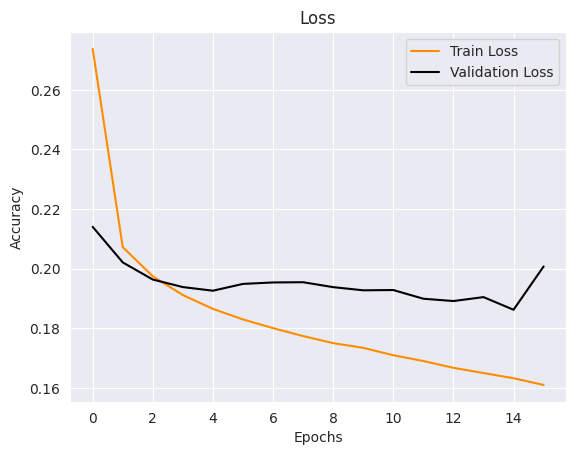

In [ ]:
sns.set_style(style='darkgrid')
plt.plot(metrics.index, metrics.loss, color='darkorange', label='Train Loss')
plt.plot(metrics.index, metrics.val_loss, color='black', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Loss")
plt.legend()
plt.show()

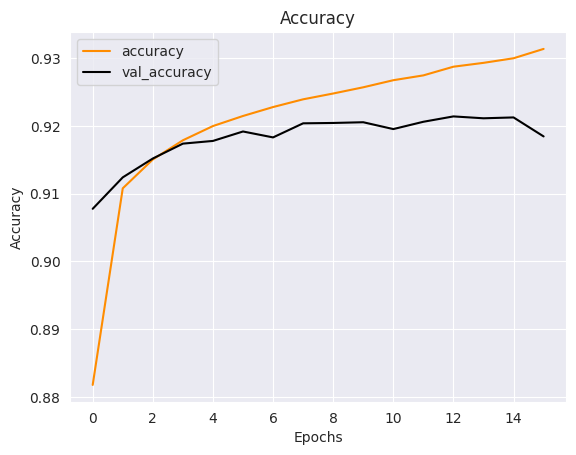

In [ ]:
sns.set_style(style='darkgrid')
plt.plot(metrics.index, metrics.accuracy, color='darkorange', label='accuracy')
plt.plot(metrics.index, metrics.val_accuracy, color='black', label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()